In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\rathi\course5-Renaissa\DS1_C5_S5_Hotel Dataset.csv')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,...,No Deposit,240.0,NaN,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,...,No Deposit,242.0,NaN,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,No Deposit,240.0,NaN,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,...,No Deposit,241.0,NaN,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,...,No Deposit,241.0,NaN,0,Transient,117.81,1,2,Check-Out,10-07-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,...,No Deposit,14.0,NaN,0,Transient,132.53,0,2,Check-Out,29-08-2017
2093,City Hotel,0,83,2017,August,35,28,1,3,1,...,No Deposit,14.0,NaN,0,Transient,147.68,0,0,Check-Out,01-09-2017
2094,City Hotel,0,189,2017,August,35,29,0,3,2,...,No Deposit,42.0,NaN,0,Transient,80.10,0,1,Check-Out,01-09-2017
2095,City Hotel,0,147,2017,August,35,28,1,5,2,...,No Deposit,14.0,NaN,0,Transient,117.00,0,1,Check-Out,03-09-2017


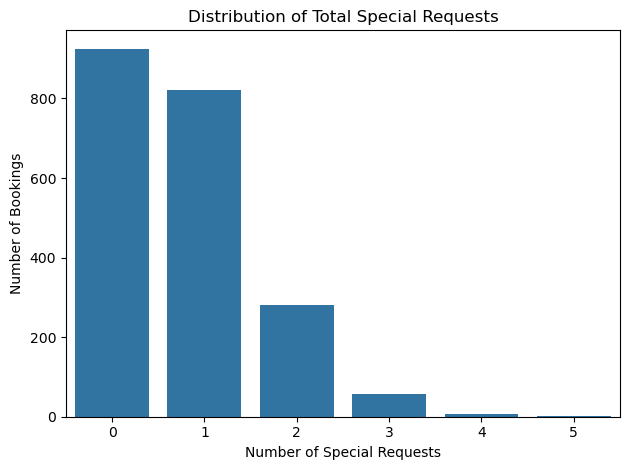

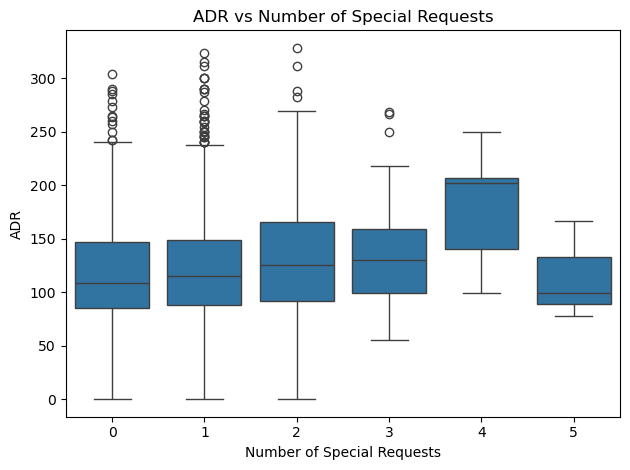

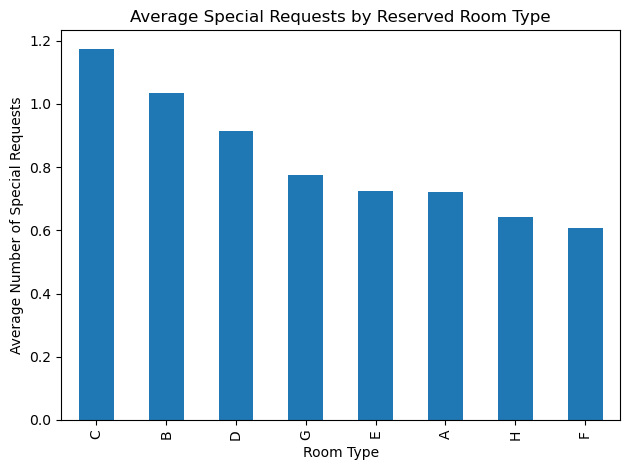

In [5]:
# Task 1: Customer Satisfaction

# 1. Distribution of special requests
sns.countplot(data=df, x='total_of_special_requests')
plt.title('Distribution of Total Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.tight_layout()
plt.show()

# 2. Special requests vs average daily rate (ADR)
sns.boxplot(data=df, x='total_of_special_requests', y='adr')
plt.title('ADR vs Number of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('ADR')
plt.tight_layout()
plt.show()

# Customer preferences for different room types
room_specials = df.groupby('reserved_room_type')['total_of_special_requests'].mean().sort_values(ascending=False)
room_specials.plot(kind='bar')
plt.title('Average Special Requests by Reserved Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Number of Special Requests')
plt.tight_layout()
plt.show()

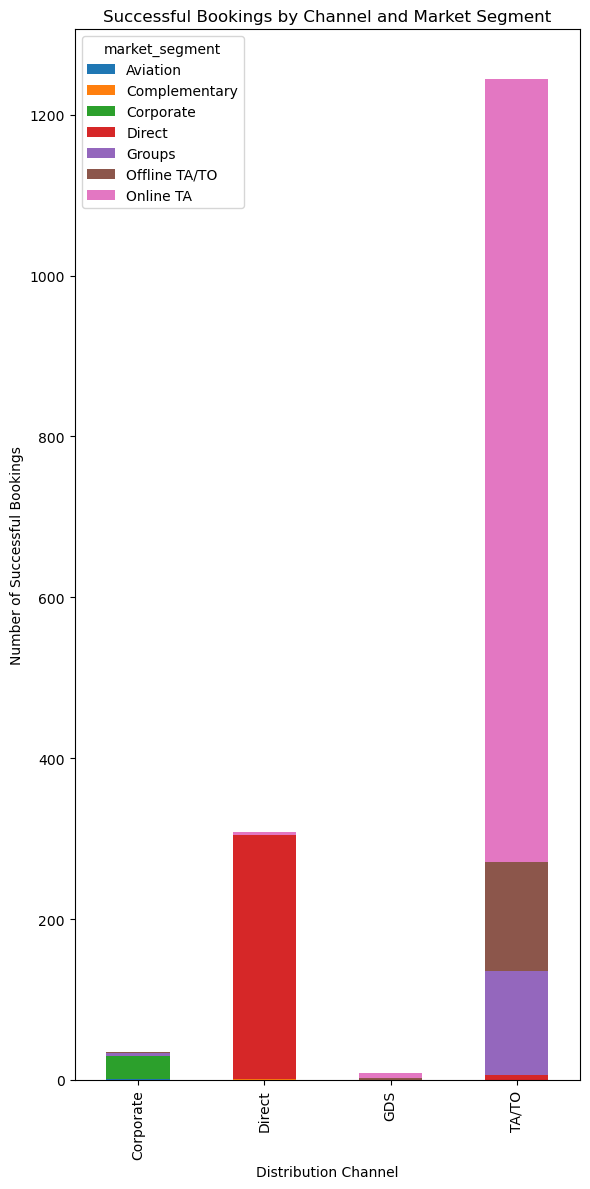

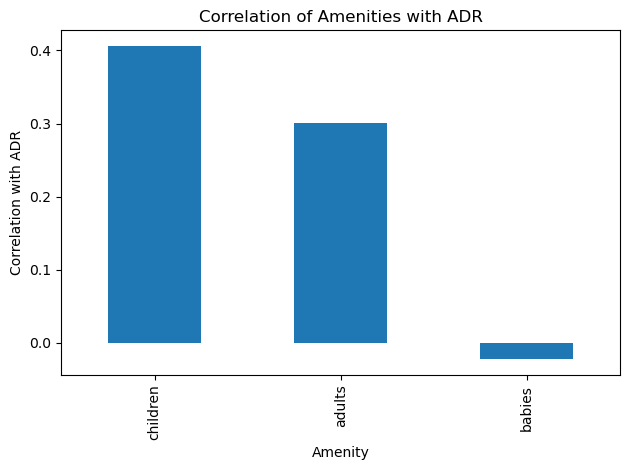

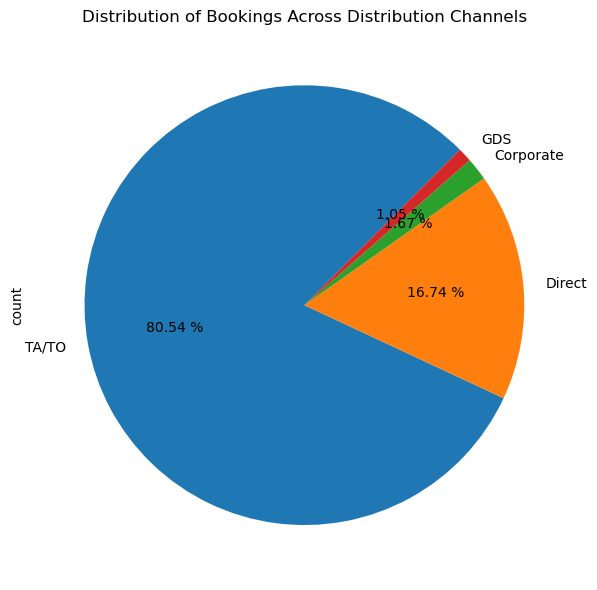

In [15]:
# Task 2: Marketing and Sales Optimization

# 1. Marketing channels and market segments vs successful bookings
successful_bookings = df[df['is_canceled'] == 0].groupby(['distribution_channel', 'market_segment']).size().unstack(fill_value=0)
successful_bookings.plot(kind='bar', stacked=True, figsize=(6, 12))
plt.title('Successful Bookings by Channel and Market Segment')
plt.xlabel('Distribution Channel')
plt.ylabel('Number of Successful Bookings')
plt.tight_layout()
plt.show()

# 2. Amenities/services with highest impact on ADR
# Replace ['babies', 'children', 'adults'] with your relevant columns indicating amenities
amenity_cols = ['babies', 'children', 'adults']
amenity_impact = df[amenity_cols + ['adr']].corr()['adr'].drop('adr').sort_values(ascending=False)
amenity_impact.plot(kind='bar')
plt.title('Correlation of Amenities with ADR')
plt.xlabel('Amenity')
plt.ylabel('Correlation with ADR')
plt.tight_layout()
plt.show()

# 3. Distribution of bookings across distribution channels
channel_dist = df['distribution_channel'].value_counts()
channel_dist.plot(kind='pie', autopct='%.2f %%', startangle=45, figsize=(10,6))
plt.title('Distribution of Bookings Across Distribution Channels')
plt.tight_layout()
plt.show()